In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

/export/home/dwaxman/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
def set_box_color(bp, colors):
    for i in range(len(colors)):
        plt.setp(bp["boxes"][i], color=colors[i])
        plt.setp(bp["whiskers"][2 * i], color=colors[i])
        plt.setp(bp["whiskers"][2 * i + 1], color=colors[i])
        plt.setp(bp["caps"][2 * i], color=colors[i])
        plt.setp(bp["caps"][2 * i + 1], color=colors[i])
        plt.setp(bp["medians"][i], color=colors[i])

In [3]:
def get_dataset_results(d_name, N):
    d = []
    for i in range(5):
        d.append(
            np.load(f"results/{d_name}_num_agents_{N}_seed_{i}_last_1000.npz")[
                "arr_0"
            ].mean()
        )

    return np.stack(d)


def get_dataset_results_dokl(d_name, N):
    d = []
    for i in range(5):
        # d.append(np.load(f"DOMKL_on_test_{d_name}_num_agents_{N}_seed_{i}.npz")["mse_test"])
        d.append(
            np.load(f"results/DOMKL_{d_name}_num_agents_{N}_seed_{i}_last_1000.npz")[
                "arr_0"
            ].mean()
        )

    return np.stack(d)


def get_full_gp_results(d_name):
    d = []
    for i in range(5):
        d.append(
            np.load(f"results/FullGP_{d_name}_seed_{i}_predict_last_1000.npz")[
                "arr_0"
            ].mean()
        )

    return np.stack(d)


twi_results = np.array(
    [
        get_full_gp_results("twi"),
        loadmat("results/adaraker_results_test_twi.mat")["erm_test"].squeeze(),
        get_dataset_results("twi", 1),
        get_dataset_results("twi", 5),
        # get_dataset_results_dokl("twi", 1),
        get_dataset_results_dokl("twi", 5),
        np.repeat(
            loadmat("results/npae_mse_test_twi_num_agents_5.mat")["mse_test"][0], 5
        ),
    ]
).T
tom_results = np.array(
    [
        get_full_gp_results("tom"),
        loadmat("results/adaraker_results_test_tom.mat")["erm_test"].squeeze(),
        get_dataset_results("tom", 1),
        get_dataset_results("tom", 5),
        # get_dataset_results_dokl("tom", 1),
        get_dataset_results_dokl("tom", 5),
        np.repeat(
            loadmat("results/npae_mse_test_tom_num_agents_5.mat")["mse_test"][0], 5
        ),
    ]
).T
energy_results = np.array(
    [
        get_full_gp_results("ene"),
        loadmat("results/adaraker_results_test_ene.mat")["erm_test"].squeeze(),
        get_dataset_results("ene", 1),
        get_dataset_results("ene", 5),
        # get_dataset_results_dokl("ene", 1),
        get_dataset_results_dokl("ene", 5),
        np.repeat(
            loadmat("results/npae_mse_test_ene_num_agents_5.mat")["mse_test"][0], 5
        ),
    ]
).T

nmse_results = [twi_results, tom_results, energy_results]

In [4]:
print(np.mean(tom_results, axis=0))
print(np.mean(energy_results, axis=0))
print(np.mean(twi_results, axis=0))

[0.00053124 0.01130854 0.00053884 0.00054293 0.00122612 0.00295804]
[0.02949543 0.0352383  0.03054008 0.03054168 0.0526042  0.09561338]
[0.00067784 0.00097172 0.00064975 0.00064987 0.00131952 0.00124218]


In [5]:
datasets = ["Twitter", "Tom's Hardware", "Energy"]
labels = ["AdaRaker", "D-RF-GP-1", "D-RF-GP-5", "DOMKL-5", "NPAE"]

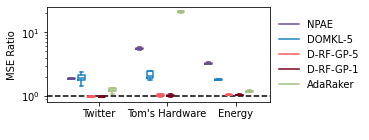

In [6]:
fig = plt.figure(figsize=(5, 1.75))
ax = plt.subplot(111)

ax.set_yscale("log")
ax.axhline(1, linestyle="--", color="black")
# colors = ["#A1C181", "#780116"]
colors = [
    "#A1C181",  # Light Green
    "#780116",  # Dark Red
    "#FF595E",  # Coral
    "#1982C4",  # Blue
    "#6A4C93",  # Purple
    "#FFCA3A",  # Yellow
    "#8AC926",  # Lime Green
    "#FF8C42",  # Orange
    "#3A86FF",  # Bright Blue
    "#2EC4B6",  # Teal
]
colors = colors[: len(labels)]

for i, nmse_result in enumerate(nmse_results):

    bp = ax.boxplot(
        nmse_result[:, 1:] / nmse_result[:, 0:1],
        positions=[i + 0.2 - 0.15 * j for j in range(len(nmse_result.T) - 1)],
        sym="",
        widths=0.1,
        autorange=True,
    )
    for element in ["boxes", "whiskers", "caps", "medians"]:
        for line in bp[element]:
            line.set_linewidth(1.5)  # Set desired linewidth
    set_box_color(bp, colors)

for color, label in zip(colors[::-1], labels[::-1]):
    ax.plot([], [], color=color, label=label)

# plt.xticks(rotation=-20)
# ax.set_ylim([5e-1, 2e0])
ax.set_xticks(range(len(datasets)), datasets)
plt.xlim(-0.75, 2.5)

box = ax.get_position()
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.xlabel(" ")
# ax.set_title("Average MSE w.r.t. SVI GP")
ax.set_ylabel("MSE Ratio")
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), frameon=False)
plt.savefig("all_results.pdf", bbox_inches="tight")

# Online Results

In [7]:
dataset = "tom"

In [8]:
results_adaraker = loadmat(f"resuls_{dataset}_3ells.mat")

In [9]:
# Update adaraker_results to use only every N_max'th data point
N_max = 5

adaraker_results = results_adaraker["erm_rf"].squeeze()

adaraker_mses = np.diff(
    np.insert(np.arange(1, len(adaraker_results) + 1) * adaraker_results, 0, 0)
)
adaraker_results = np.cumsum(adaraker_mses[::5]) / np.arange(
    1, len(adaraker_mses[::N_max]) + 1
)

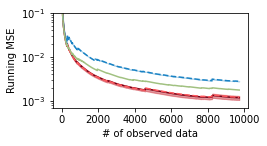

In [10]:
fig = plt.figure(figsize=(3.5, 1.75))
ax = plt.subplot(111)

###########################
######### DRFGP-1 #########
###########################
results = []
# Load in results for each seed
for seed in range(5):
    result = np.load(
        f"results/{dataset}_num_agents_1_seed_{seed}_L_1_graph_alpha_0.1_every_five.npz"
    )["arr_0"]
    results.append(result)

# Convert to numpy array
results = np.array(results)

# Plot with semilog axes
plt.semilogy(
    np.arange(1, results.shape[1] * N_max, N_max),
    np.median(results, 0),
    label="DRFGP-1",
    color=colors[1],
)
plt.fill_between(
    np.arange(1, results.shape[1] * N_max, N_max),
    np.quantile(results, 0.95, axis=0),
    np.quantile(results, 0.05, axis=0),
    alpha=0.3,
    color=colors[1],
)


###########################
######### DRFGP-5 #########
###########################
results = []
# Load in results for each seed
for seed in range(5):
    result = np.load(
        f"results/{dataset}_num_agents_5_seed_{seed}_L_10_graph_alpha_0.25_every_five.npz"
    )["arr_0"]
    results.append(result)

# Convert to numpy array
results = np.array(results)

# Plot with semilog axes
plt.semilogy(
    np.arange(1, results.shape[1] * N_max, N_max),
    np.median(results, 0),
    label="DRFGP-5",
    color=colors[2],
    ls="dashed",
)
plt.fill_between(
    np.arange(1, results.shape[1] * N_max, N_max),
    np.quantile(results, 0.95, axis=0),
    np.quantile(results, 0.05, axis=0),
    alpha=0.3,
    color=colors[2],
)

###########################
######### DOMKL-5 #########
###########################
results = []
# Load in results for each seed
for seed in range(5):
    result = np.load(f"results/DOMKL_{dataset}_num_agents_5_seed_{i}.npz")[
        "running_errs"
    ]
    results.append(result)

# Convert to numpy array
results = np.array(results)

# Plot with semilog axes
plt.semilogy(
    np.arange(1, results.shape[1] * N_max, N_max),
    np.median(results, 0),
    label="DOMKL-5",
    ls="dashed",
    color=colors[3],
)
plt.fill_between(
    np.arange(1, results.shape[1] * N_max, N_max),
    np.quantile(results, 0.95, axis=0),
    np.quantile(results, 0.05, axis=0),
    alpha=0.3,
    color=colors[3],
)

############################
######### AdaRaker #########
############################
plt.semilogy(
    np.arange(1, len(adaraker_results) * 5, 5),
    adaraker_results,
    label="AdaRaker",
    color=colors[0],
)

if dataset == "tom":
    plt.ylim(0.7e-3, 1e-1)
plt.xlabel("# of observed data")
plt.ylabel("Running MSE")
plt.savefig("TomsHardwareResults.pdf", bbox_inches="tight")